In [0]:
from IPython.display import clear_output
# Import necessary library
import pandas as pd
import numpy as np
import nltk
import os

In [3]:
path = "/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/InsideAirbnb/data/"
listings = pd.read_csv(path+"listings.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
host_numeric_columns = [
                        # "host_id",
                        "host_acceptance_rate","host_response_time","host_response_rate","host_listings_count",
                        "host_total_listings_count",
                        # "square_feet",
                        "price",#"weekly_price","monthly_price",
                        "security_deposit","cleaning_fee","guests_included","extra_people","number_of_reviews",
                        "number_of_reviews_ltm","calculated_host_listings_count","calculated_host_listings_count_entire_homes",
                        "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms",
                        "reviews_per_month"]
host_score_columns = ["review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin",
                      "review_scores_communication","review_scores_location","review_scores_value"
                      ]

In [0]:
df = listings[host_numeric_columns]

In [8]:
df.head()

,host_acceptance_rate,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100%,within an hour,100%,3.0,3.0,$50.00,NaN,$10.00,1,$0.00,227,38,3,0,3,0,2.07
1,NaN,NaN,NaN,1.0,1.0,$30.00,NaN,NaN,1,$10.00,1,1,1,0,1,0,0.09
2,100%,within an hour,100%,3.0,3.0,$50.00,$0.00,$10.00,1,$0.00,182,47,3,0,3,0,1.69
3,78%,within a few hours,100%,4.0,4.0,$55.00,NaN,NaN,1,$13.00,110,0,3,0,3,0,1.03
4,100%,within an hour,90%,0.0,0.0,$29.00,$0.00,$16.00,1,$0.00,311,54,3,0,3,0,3.19


In [14]:
df.head(1).T

,0
host_acceptance_rate,100%
host_response_time,within an hour
host_response_rate,100%
host_listings_count,3
host_total_listings_count,3
price,$50.00
security_deposit,NaN
cleaning_fee,$10.00
guests_included,1
extra_people,$0.00


## fill the 'host_response_time', 'host_acceptance_rate'

In [0]:
def get_host_response_time(x):
  if x =='within an hour':
    return 0
  elif x == 'within a few hours':
    return 1
  elif x == 'within a day':
    return 2
  elif x == 'a few days or more':
    return 3
  else:
    return np.NaN
def get_host_acceptance_rate(x):
  if type(x)==type(np.NaN):
    return x
  num = float(x[:-1])/100
  return num

from decimal import Decimal
from re import sub
def get_price(x):
  if type(x)==type(np.NaN):
    return 0
  # num = float(x[1:])/100
  num = Decimal(sub(r'[^\d.]', '', x))
  return int(num)

In [0]:
df['host_response_time'] = df['host_response_time'].apply(get_host_response_time)
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(get_host_acceptance_rate)
df['host_response_rate'] = df['host_response_rate'].apply(get_host_acceptance_rate)
df['price'] = df['price'].apply(get_price)
df['security_deposit'] = df['security_deposit'].apply(get_price)
df['cleaning_fee'] = df['cleaning_fee'].apply(get_price)
df['extra_people'] = df['extra_people'].apply(get_price)
clear_output()

# calculate overall score

In [0]:
res = listings['review_scores_accuracy']
for target in host_score_columns[2:]:
  print(target)
  res = listings[target]+res
df['score'] = (res/6)*10
clear_output()

# Missing Value 


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


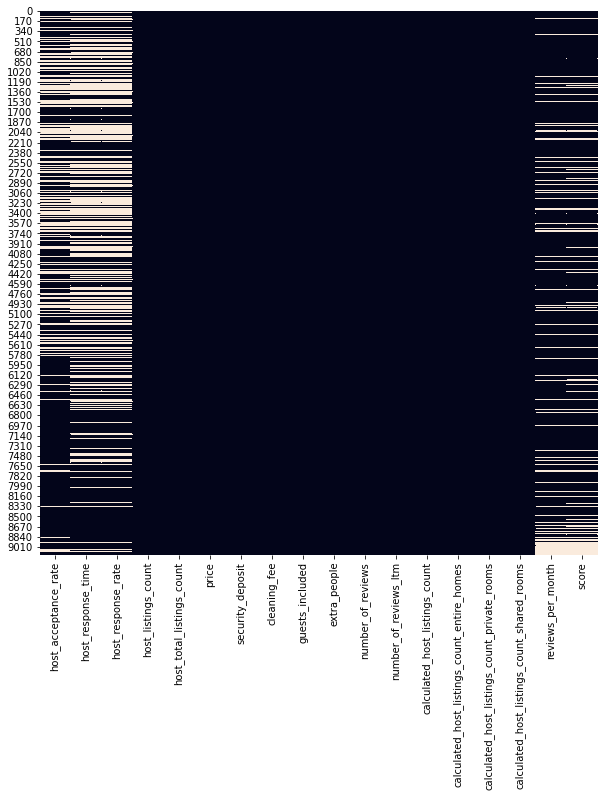

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

In [0]:
# df = df.drop(columns=["weekly_price","monthly_price"])

In [0]:
df.head(1)

,host_acceptance_rate,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,0.0,1.0,3.0,3.0,50,0,10,1,0,227,38,3,0,3,0,2.07


# correlation matrix

In [0]:
corrMatrix = df.corr()

In [0]:
corrMatrix

,host_acceptance_rate,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
host_acceptance_rate,1.000000,-0.514146,0.342086,0.066129,0.066129,0.013299,-0.012857,0.021715,0.067317,-0.005039,0.210667,0.299984,0.143845,0.111670,0.076492,0.030707,0.322890
host_response_time,-0.514146,1.000000,-0.614045,-0.011591,-0.011591,-0.004955,-0.025171,-0.065399,-0.059473,0.010434,-0.186434,-0.270630,-0.165848,-0.129955,-0.082171,-0.028630,-0.309501
host_response_rate,0.342086,-0.614045,1.000000,0.018613,0.018613,-0.025314,0.002756,0.027988,0.029862,-0.009351,0.117708,0.152295,0.055699,0.064946,-0.009072,-0.015716,0.162470
host_listings_count,0.066129,-0.011591,0.018613,1.000000,1.000000,0.032321,0.017061,0.031236,0.030349,-0.024934,-0.020821,-0.015393,0.321588,0.341920,0.032961,0.017511,0.043106
host_total_listings_count,0.066129,-0.011591,0.018613,1.000000,1.000000,0.032321,0.017061,0.031236,0.030349,-0.024934,-0.020821,-0.015393,0.321588,0.341920,0.032961,0.017511,0.043106
price,0.013299,-0.004955,-0.025314,0.032321,0.032321,1.000000,0.078047,0.152057,0.100897,0.048393,-0.029048,-0.008197,0.042559,0.061801,-0.022225,-0.022121,0.005776
security_deposit,-0.012857,-0.025171,0.002756,0.017061,0.017061,0.078047,1.000000,0.356878,0.189776,0.185465,0.005797,-0.012979,0.082416,0.132557,-0.058671,-0.009588,-0.024051
cleaning_fee,0.021715,-0.065399,0.027988,0.031236,0.031236,0.152057,0.356878,1.000000,0.440887,0.193816,0.034322,0.053650,0.167826,0.284028,-0.150082,-0.030252,0.028644
guests_included,0.067317,-0.059473,0.029862,0.030349,0.030349,0.100897,0.189776,0.440887,1.000000,0.328976,0.100881,0.117592,0.133188,0.206934,-0.092045,-0.033499,0.093926
extra_people,-0.005039,0.010434,-0.009351,-0.024934,-0.024934,0.048393,0.185465,0.193816,0.328976,1.000000,0.053077,0.029588,-0.012901,-0.009426,-0.017532,0.045891,-0.001254


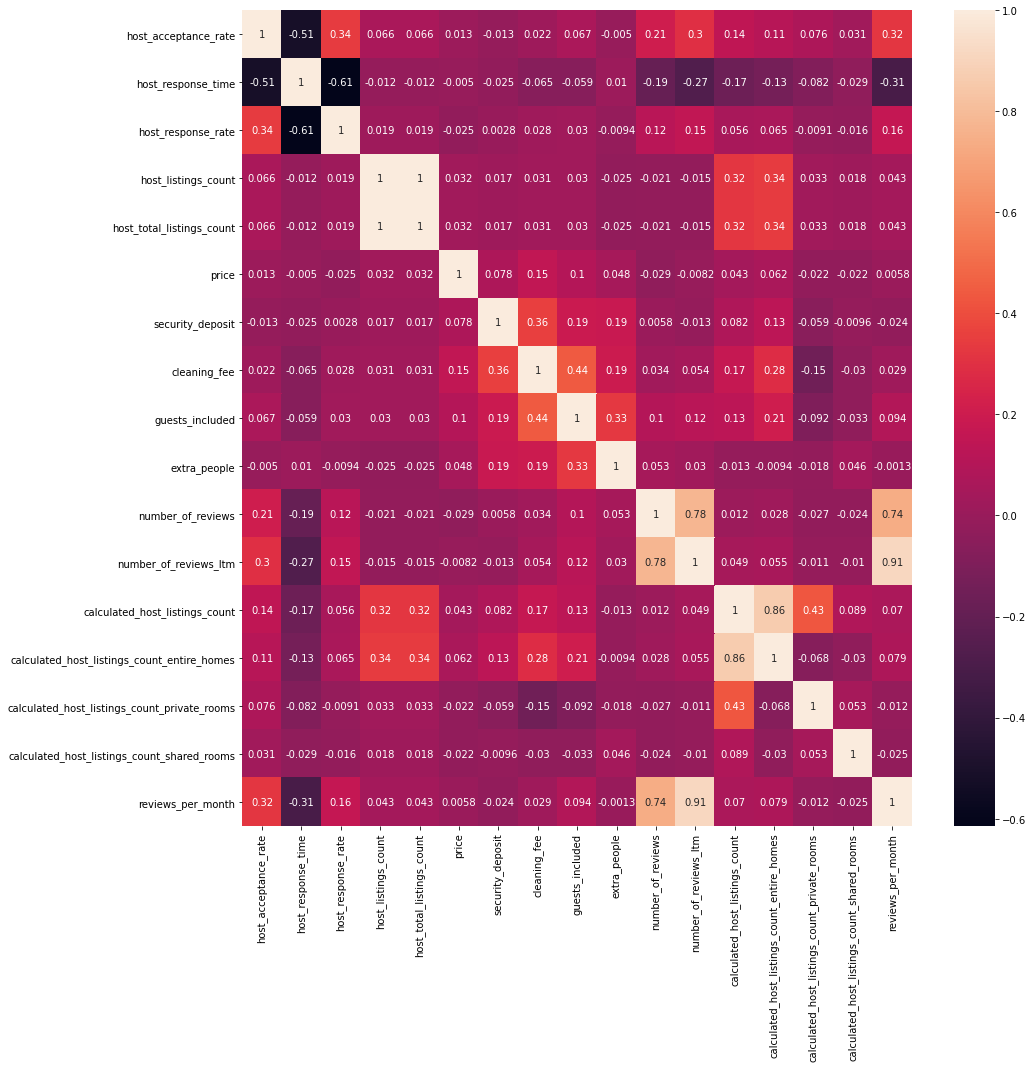

In [0]:
plt.figure(figsize=(15,15))
sns.heatmap(corrMatrix,annot=True)

## distribution plot

Text(0.5, 1.0, 'host response rate & host acceptance_rate')

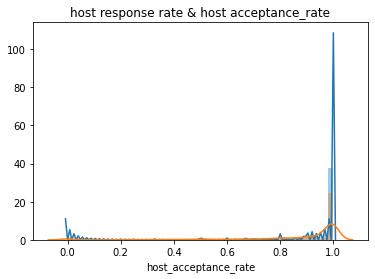

In [0]:
sns.distplot(df['host_response_rate'])
sns.distplot(df['host_acceptance_rate'])
plt.title('host response rate & host acceptance_rate')

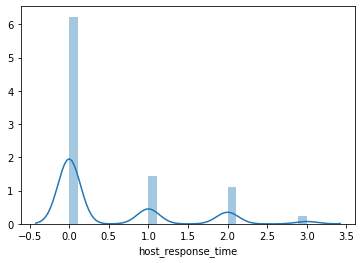

In [0]:
sns.distplot(df['host_response_time'])

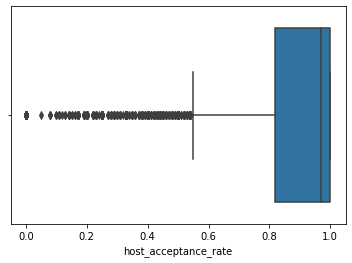

In [0]:
sns.boxplot(df['host_acceptance_rate'])

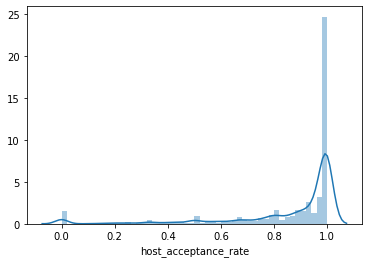

In [0]:
sns.distplot(df['host_acceptance_rate'])

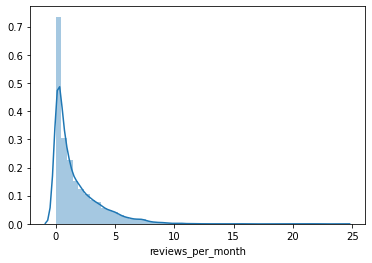

In [0]:
sns.distplot(df['reviews_per_month'])

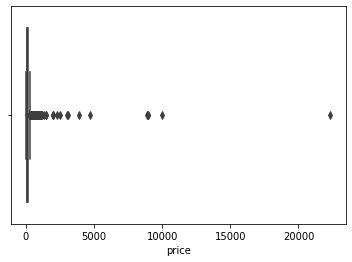

In [0]:
sns.boxplot(df['price'])

# missing data imputation


In [0]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [0]:
imp = IterativeImputer(max_iter=100,sample_posterior=True,tol = 0.000001)
imp.fit(df)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=100, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=True, skip_complete=False, tol=1e-06,
                 verbose=0)

In [0]:
df_res = imp.transform(df)

In [0]:
df.columns

Index(['host_acceptance_rate', 'host_response_time', 'host_response_rate',
       'host_listings_count', 'host_total_listings_count', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'number_of_reviews', 'number_of_reviews_ltm',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'score'],
      dtype='object')

In [0]:
df_imputed = pd.DataFrame(df_res,columns=df.columns)
df_imputed.head()

,host_acceptance_rate,host_response_time,host_response_rate,host_listings_count,host_total_listings_count,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,score
0,1.000000,0.000000,1.0000,3.0,3.0,50.0,0.0,10.0,1.0,0.0,227.0,38.0,3.0,0.0,3.0,0.0,2.07,100.000000
1,0.491071,1.195797,0.7402,1.0,1.0,30.0,0.0,0.0,1.0,10.0,1.0,1.0,1.0,0.0,1.0,0.0,0.09,90.529672
2,1.000000,0.000000,1.0000,3.0,3.0,50.0,0.0,10.0,1.0,0.0,182.0,47.0,3.0,0.0,3.0,0.0,1.69,98.333333
3,0.780000,1.000000,1.0000,4.0,4.0,55.0,0.0,0.0,1.0,13.0,110.0,0.0,3.0,0.0,3.0,0.0,1.03,91.666667
4,1.000000,0.000000,0.9000,0.0,0.0,29.0,0.0,16.0,1.0,0.0,311.0,54.0,3.0,0.0,3.0,0.0,3.19,98.333333


In [0]:
df_imputed.to_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/listings_imputed.csv')

In [0]:
df.columns
df_list = [
       'id',
       'host_listings_count', 'host_total_listings_count', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'number_of_reviews', 'number_of_reviews_ltm',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms',
       'score']

In [25]:
df['id'] = listings['id']
df[df_list].to_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/listings_imputed.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## prporation of missing values

In [0]:
missing_res = df_dn['host_acceptance_rate'].isna().value_counts()
missing_res[1]/(missing_res[0]+missing_res[1])

0.21949265687583444

In [0]:
missing_res =df_dn['host_response_time'].isna().value_counts()
missing_res[1]/(missing_res[0]+missing_res[1])

0.3538050734312417

In [0]:
missing_res =df_dn['host_response_rate'].isna().value_counts()
missing_res[1]/(missing_res[0]+missing_res[1])

0.3538050734312417